# Ejercicio 4 - Parte 2

Generamos el conjunto de datos **Iris**. 

In [32]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 

# Cargamos el conjunto de datos. 
iris = load_iris()
# Creamos la matriz de características.
X = iris.data
# Creamos el vector de características.
y = iris.target

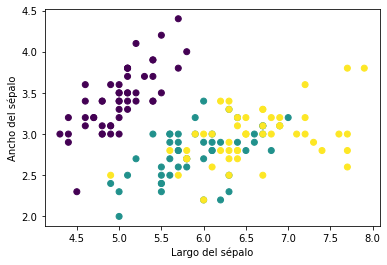

In [33]:
# Visualizamos los puntos de entrenamiento.
plt.scatter(X[:,0], X[:,1], c = y)
plt.xlabel('Largo del sépalo')
plt.ylabel('Ancho del sépalo')
plt.show()

## One - hot encoding

Los estímulos (vectores de entrada) son codificados para mostrar un $1$ en entrada correspondiente a su valor, por ejemplo
\begin{equation*}
    2 = [0, 0, 1]
\end{equation*}

In [34]:
from sklearn.preprocessing import OneHotEncoder

y = iris.target.reshape(-1,1)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

## Softmax

Ahora, no sólo queremos un valor entre $0$ y $1$, sino que queremos un vector en el que la salida deseada marque un $1$ y los demás $0$ (o algo cercano, en ambos casos). Es decir, no podemos usar $n$ *sigmoides* porque el valor de cada entrada está condicionada a ser $1$ sólo si los demás dan $0$.

Esto se puede lograr con la función *Softmax* que nos da la probabilidad $i$-ésima de cada entrada en el vector aleatorio $x$.

\begin{equation*}
    p_i = \frac{e^{x_i}}{\sum_{j}^{N} e^{x_j}}
\end{equation*}

## Cross-Entropy

Pero ahora no podemos usar el *MSE* (ni *MAE*) como nuestra función de error. Debemos usar algo que nos permita ponderar el error de haberle 'atinado' a la entrada deseada con un $1$, y con un $0$ a las demás.

*Cross-Entropy* es la función que generaliza a la función que usamos para el caso binario.

\begin{equation*}
    CE = \sum_{i}^{N} y_i \log (x_i)
\end{equation*}

## Parámetros, arquitectura y funciones.

In [35]:
import numpy as np

def sigmoide(z):
    return 1 / (1 + np.exp(-z))

def sigmoide_prima(x):
    return sigmoide(x) * (1 - sigmoide(x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis = 1, keepdims = True)

N = X.shape[0]  # número de instancias
n = X.shape[1]  # dimensión de instancias
nh = 8          # número de neuronas ocultas
m = 3           # dimensión salida

wh = np.random.rand(n,nh)  # pesos escondidos
bh = np.random.randn(nh)   # nodo sesgo escondidos

wo = np.random.rand(nh,m)  # pesos salida
bo = np.random.randn(m)    # nodo salida
lr = 0.00001               # tasa

## Entrenamiento usando la función $\gamma$

In [36]:
from sklearn.model_selection import train_test_split

# Dividimos nuestro conjunto de datos para poder manejarlo.
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [39]:
J = []
for epoca in range (50000):
    # Retropropagacion
    
    # Feed forward
    zh = np.dot(X_train, wh) + bh   # activación escondidas
    ah = sigmoide(zh)               # disparo escondidas (neuronas escondidas)

    zo = np.dot(ah, wo) + bo        # activacion salida 
    ao = softmax(zo)                # disparo salida (neuronas salida)
    
    # Envío de error hacia atrás
    
    # Capa salida - escondida  
    error = ao - y_train

    deltas_wo = np.dot(ah.T, error)
    deltas_bo = error

    # Capa escondida - entrada
    temp_dah = np.dot(error , wo.T)
    deriv_h = sigmoide_prima(zh)

    deltas_wh = np.dot(X_train.T, deriv_h * temp_dah)
    deltas_bh = temp_dah * deriv_h

    # Actualizacion de pesos
    wh -= lr * deltas_wh
    bh -= lr * deltas_bh.sum(axis=0)

    wo -= lr * deltas_wo
    bo -= lr * deltas_bo.sum(axis=0)
    
    if epoca % 200 == 0:
        logL = np.sum(-y_train * np.log(ao))
        print('logL function value: ', logL)
        J.append(logL)

logL function value:  30.19332249184574
logL function value:  30.06178742473871
logL function value:  29.931047182629577
logL function value:  29.80109936833518
logL function value:  29.67194151467769
logL function value:  29.543571086082338
logL function value:  29.415985480197026
logL function value:  29.289182029530075
logL function value:  29.163158003103824
logL function value:  29.03791060812051
logL function value:  28.91343699163847
logL function value:  28.78973424225553
logL function value:  28.666799391797483
logL function value:  28.5446294170092
logL function value:  28.423221241246225
logL function value:  28.302571736164808
logL function value:  28.182677723408077
logL function value:  28.06353597628727
logL function value:  27.94514322145531
logL function value:  27.827496140571895
logL function value:  27.71059137195786
logL function value:  27.59442551223804
logL function value:  27.478995117970662
logL function value:  27.364296707262497
logL function value:  27.2503

logL function value:  15.033954706181127
logL function value:  14.995829549739963
logL function value:  14.957901824345962
logL function value:  14.920170100232045
logL function value:  14.882632959802129
logL function value:  14.845288997525287
logL function value:  14.808136819830514
logL function value:  14.771175045002233
logL function value:  14.734402303076557
logL function value:  14.697817235738086
logL function value:  14.6614184962176
logL function value:  14.625204749190297
logL function value:  14.58917467067477
logL function value:  14.55332694793283
logL function value:  14.517660279369835
logL function value:  14.482173374435938
logL function value:  14.446864953527886
logL function value:  14.411733747891667
logL function value:  14.376778499525717
logL function value:  14.341997961085088
logL function value:  14.30739089578609
logL function value:  14.272956077311878
logL function value:  14.238692289718525
logL function value:  14.20459832734206
logL function value:  

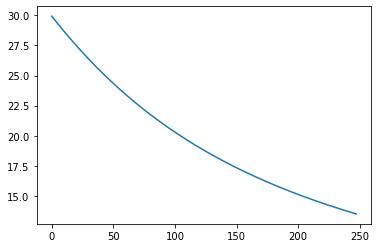

In [40]:
plt.plot(J[2:])

Finalmente, utilizamos la función

In [41]:
def predict(wh, wo, fact1, fact2, x):
    zh = np.dot(x.T, wh) + bh           # activacion escondidas
    ah = fact1(zh)                      # disparo escondidas (neuronas escondidas)
    
    zo = np.dot(ah, wo) + bo            # activacion salida 
    ao = fact2(zo)                      # disparo salida (neuronas salida)
    return ao

para clasificar los estímulos solicitados:

In [43]:
v1 = np.array([[5.97],[4.20],[1.23],[0.25]])
v2 = np.array([[6.80],[5.00],[1.25],[1.20]])
v3 = np.array([[12.50],[9.20],[40.32],[21.55]])

p1 = predict(wh, wo, sigmoide, softmax, v1)
p2 = predict(wh, wo, sigmoide, softmax, v2)
p3 = predict(wh, wo, sigmoide, softmax, v3)

print(p1)
print(p2)
print(p3)

[[0.96800806 0.02926022 0.00273171]]
[[0.96823689 0.02905003 0.00271307]]
[[0.00214928 0.03275745 0.96509327]]
